# Anushri N R

# The Sparks Foundation
## GRIP TASK 1: Predict the percentage of a student based on the number of study hours.

## Exploratory Data Analysis 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the CSV file 

In [2]:
df=pd.read_csv(r"http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Preprocessing 

### i) Checking for missing values 

In [5]:
df.isna().sum()

#There are no missing values

Hours     0
Scores    0
dtype: int64

### ii) The dataset doesn't contain any categorical data therefore there is no need for encoding 

### iii) Plotting the distribution of the scores to make sure there is a linear relationship 

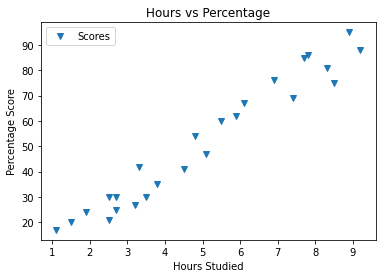

In [6]:
df.plot(x='Hours', y='Scores', style='v')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#The graph below shows a clear positive linear relationship between the feature and the target.

### iv) Checking for outliers 

In [7]:
print(df['Hours'].mean()," ",df['Hours'].median())
print(df['Scores'].mean()," ",df['Scores'].median())

#Since the mean and the median of each column is almost coinciding, we can conclude that there are no outliers

5.012   4.8
51.48   47.0


### Splitting the dataset into dependent and independent variables 

In [8]:
x1=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

### Splitting the dataset into test and train sets 

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x1, y,test_size=0.2, random_state=0) 

### Creating and training the linear regression model

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


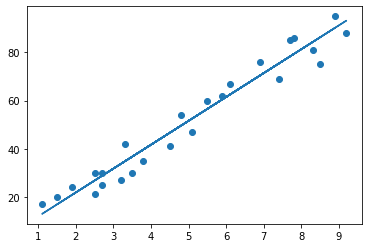

In [11]:
# Plotting the regression line
line = regressor.coef_*x1+regressor.intercept_

# Plotting for the test data
plt.scatter(x1, y)
plt.plot(x1, line);
plt.show()

In [12]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicted score if a student studies 9.25 hours/day 

In [14]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Calculating R squared score and RMSE 

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("R2 score=",r2)
print("RMSE= ",rmse)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

R2 score= 0.9454906892105355
RMSE=  4.647447612100368
Mean Absolute Error: 4.18385989900298
